<a href="https://colab.research.google.com/github/mnikolic7/PHY562_Spring25_MakingMeasurements/blob/main/main_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlations of the positional errors in fly embryo
## Data description
Data and analysis from:

*McGough, Lauren, et al. "Finding the last bits of positional information"
PRX Life 2.1 (2024): 013016.*

The data set includes measurements of gene expression in the fruitfly
embryo during the period between 2 to 3 hours post fertilization.
During this period, the embryo consists of ~6000 identical nuclei, that
are arranged along the embryo surface in a 2D lattice. They have no cell
membrane, although the cell membrane slowly grows and forms during this
60 min period.

Gene expression is measured by fixing the embryos (hence the data
represents one snapshot for each embryo), and performing
immunofluorescence staining of three proteins (Even-skipped, Runt, and
Paired). All three genes are imaged in the same embryo using three
different fluorescence channels, and many embryos (N=109) are imaged.
For each embryo, we look at one optical section through the middle of the
embryo (midsaggital plane), which cuts through the 2D array of nuclei. We
focus on the dorsal side, which in our images looks like a straight line
with fluorescence intensity that varies in the characteristic pattern of
the three proteins we looked at.

An image processing protocol was used to extract the fluorescence
intensity along the dorsal side of the embryo. We look at the
fluorescence intensity of all three genes as a function of scaled
position in the embryo, where 0 = embryo anterior, and 1 = embryo
posterior.

The variables profiles_'gene' are 1000x109 arrays in which i^th column is
the fluorescence intensity as a function the scaled position in the i^th
embryo. Each column corresponds to one embryo.

The embryo "age" is defined as the time in the nuclear cycle 14 (after 13
syncrhonized divisions post fertilization). Nuclear cycle 14 is the
longest and last ~60 min. The variable 'age' contains the experimentally
determined time in the nuclear cycle 14.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

!wget https://github.com/mnikolic7/PHY562_Spring25_MakingMeasurements/raw/refs/heads/main/pair_rule_expression_data.mat
data = sio.loadmat('pair_rule_expression_data.mat')

In [4]:
age=data['age'].flatten()
Nemb=age.shape[0];
x=np.arange(1000)/1000
Eve=data['profiles_eve']
Run=data['profiles_run']
Prd=data['profiles_prd']

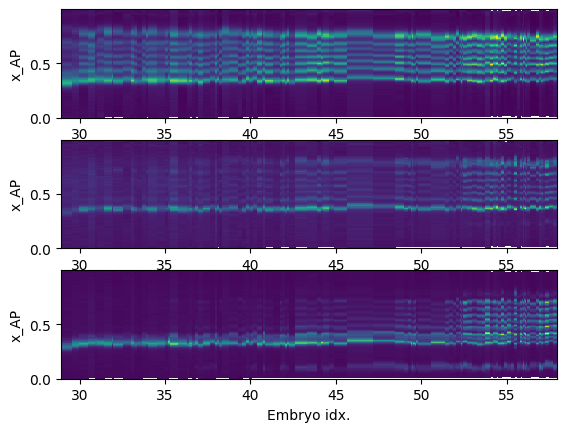

In [6]:
ax1=plt.subplot(3,1,1)
ax1.pcolor(age,x,Eve)
plt.xlabel('Embryo idx.')
plt.ylabel('x_AP')

ax2=plt.subplot(3,1,2)
ax2.pcolor(age,x,Run)
plt.xlabel('Embryo idx.')
plt.ylabel('x_AP')

ax3=plt.subplot(3,1,3)
ax3.pcolor(age,x,Prd)
plt.xlabel('Embryo idx.')
plt.ylabel('x_AP')

plt.show()


### Note 1
For the rest of the exercise, it is recommended to use only the relevant
portion of the profiles where the stripes are visible: ~0.3 - 0.85 x.
###Note 2
The expression of eve, run and prd genes takes time. By ~30 min in n.c.14
the expression of eve is high enough so that we can clearly see the 7
striped pattern of Eve protein. This happens a bit later for Run and Prd,
and you will have to decide in which Run and Prd profiles you are able to
use for the process of localizing the position of the 7 stripes.
###Note 3
Paired (Prd) has an additional but distinguishable small expression
stripe/peak appearing between the first and the second stripe in the very
late embryos. You can (and should) ignore it in your analysis, but you
should be careful about how it might affect your analysis protocol.